In [ ]:
### APO Minimization and Equilibration test ###

In [3]:

from SBLMDCOVDOCK import SBLSettings

settings = SBLSettings.GROMACS_Settings()

import pandas as pd
import os

import gmxapi as gmx
import subprocess
import matplotlib.pyplot as plt
#collect APO structures 

# AMPC - https://journals.asm.org/doi/10.1128/AAC.02073-20
ampc = "6T3D"
# KPC-2 - BLDB: http://dx.doi.org/10.1021/ACS.JMEDCHEM.7B00158
kpc2 = "5UL8"
# OXA-10 - BLDB: https://www.pnas.org/doi/full/10.1073/pnas.241442898
oxa10 = "1K55"

structures = pd.DataFrame({"PDBID": [ampc, kpc2, oxa10], 
                           "Name": ["AmpC", "KPC2", "OXA10"]})


In [4]:
def plot_xvg(filename):
    # Read the file and get lines
    with open(filename, 'r') as file:
        lines = file.readlines()

    # Extract labels and units from the file
    x_label = [line.split('"')[1] for line in lines if '@    xaxis  label' in line][0]
    y_label = [line.split('"')[1] for line in lines if '@    yaxis  label' in line][0]
    title = filename.split("/")[-1].replace(".xvg", "") + " " + [line.split('"')[1] for line in lines if '@    title' in line][0]
    # Read the data, skipping comment lines starting with '#', '@', or '&'
    data = pd.read_csv(filename, comment='@', skiprows=24, delim_whitespace=True, names=['x', 'y'], header=None)

    # Plot the data
    plt.figure(figsize=(10, 6))
    plt.plot(data['x'], data['y'])
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)
    plt.show()

# Call the function with the provided file



In [14]:
# Create Box, Solvate, add Ions
for pdbcode in structures.PDBID:
    break # tested working 
    print(pdbcode)  
    # Input path
    input_path = os.path.join(settings.structures_output, "APO_" + pdbcode + ".gro")
    
    # Output paths
    box_output_path = input_path.replace(".gro", "_box.pdb")

    # Define the editconf command
    editconf_command = ["gmx", "editconf", "-f", input_path, "-o", box_output_path, "-c", "-d", "1.0", "-bt", "cubic"]

    # Run the editconf command
    subprocess.run(editconf_command, check=True) 
    # subprocess.run(editconf_command.replace(".pdb",".gro"), check=True) 


    solvated_output_path = input_path.replace(".gro", "_solv.gro")

    topo_path = input_path.replace(".gro", ".top")

    # Define the solvate command
    solvate_command = ["gmx", "solvate", "-cp", box_output_path, "-cs", "spc216.gro", "-p", topo_path, "-o", solvated_output_path]

    # Run the solvate command
    subprocess.run(solvate_command, check=True)

    ion_MDP = os.path.join(settings.config, "ions.mdp")
    # Generate tpr for genion
    grompp_command = ["gmx", "grompp", "-f", ion_MDP, "-c", solvated_output_path, "-p", topo_path, "-o", solvated_output_path.replace(".gro", ".tpr")]

    # Run the grompp command
    subprocess.run(grompp_command, check=True)

    ionised_output_path = solvated_output_path.replace(".gro", "_ion.gro")

    # Define the genion command
    genion_command = ["gmx", "genion", "-s", solvated_output_path.replace(".gro", ".tpr"), "-o", ionised_output_path, "-p", topo_path, "-pname", "NA", "-nname", "CL", "-neutral", "-conc", "0.15"]

    # Run the genion command
    subprocess.run(genion_command, input='SOL\n', check=True, text=True)

    



Statistics over 1350 steps [ 0.0000 through 1349.0000 ps ], 1 data sets
All statistics are over 1069 points (frames)

Energy                      Average   Err.Est.       RMSD  Tot-Drift
-------------------------------------------------------------------------------
Potential                -1.01204e+06      21000    60081.4    -133848  (kJ/mol)


                      :-) GROMACS - gmx energy, 2023.2 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /home/alexi/Documents/SBL_MD_CovDock
Command line:
  gmx energy -f prod_structures/APO/APO_6T3D_min.edr -o prod_structures/APO/APO_6T3D_min_energy.xvg

Opened prod_structures/APO/APO_6T3D_min.edr as single precision energy file

Select the terms you want from the following list by
selecting either (part of) the name or the number or a combination.
End your selection with an empty line or a zero.
-------------------------------------------------------------------
  1  Bond             2  Angle            3  Proper-Dih.      4  Per.-Imp.-Dih.
  5  LJ-14            6  Coulomb-14       7  LJ-(SR)          8  Coulomb-(SR)  
  9  Coul.-recip.    10  Potential       11  Pressure        12  Vir-XX        
 13  Vir-XY          14  Vir-XZ          15  Vir-YX          16  Vir-YY        
 17  Vir-YZ          18  Vir-ZX          19  Vir-ZY          20  

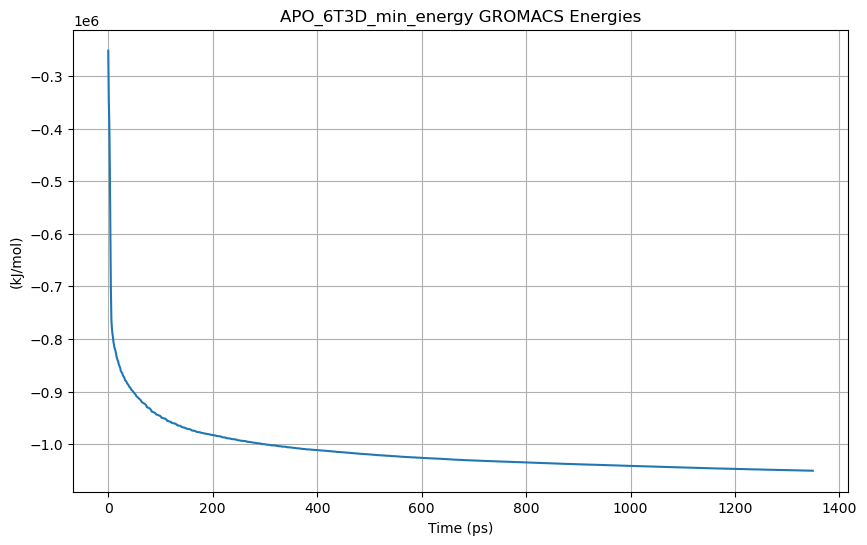


Statistics over 1344 steps [ 0.0000 through 1343.0000 ps ], 1 data sets
All statistics are over 1064 points (frames)

Energy                      Average   Err.Est.       RMSD  Tot-Drift
-------------------------------------------------------------------------------
Potential                   -849960      16000    44017.3    -104941  (kJ/mol)


                      :-) GROMACS - gmx energy, 2023.2 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /home/alexi/Documents/SBL_MD_CovDock
Command line:
  gmx energy -f prod_structures/APO/APO_5UL8_min.edr -o prod_structures/APO/APO_5UL8_min_energy.xvg

Opened prod_structures/APO/APO_5UL8_min.edr as single precision energy file

Select the terms you want from the following list by
selecting either (part of) the name or the number or a combination.
End your selection with an empty line or a zero.
-------------------------------------------------------------------
  1  Bond             2  Angle            3  Proper-Dih.      4  Per.-Imp.-Dih.
  5  LJ-14            6  Coulomb-14       7  LJ-(SR)          8  Coulomb-(SR)  
  9  Coul.-recip.    10  Potential       11  Pressure        12  Vir-XX        
 13  Vir-XY          14  Vir-XZ          15  Vir-YX          16  Vir-YY        
 17  Vir-YZ          18  Vir-ZX          19  Vir-ZY          20  

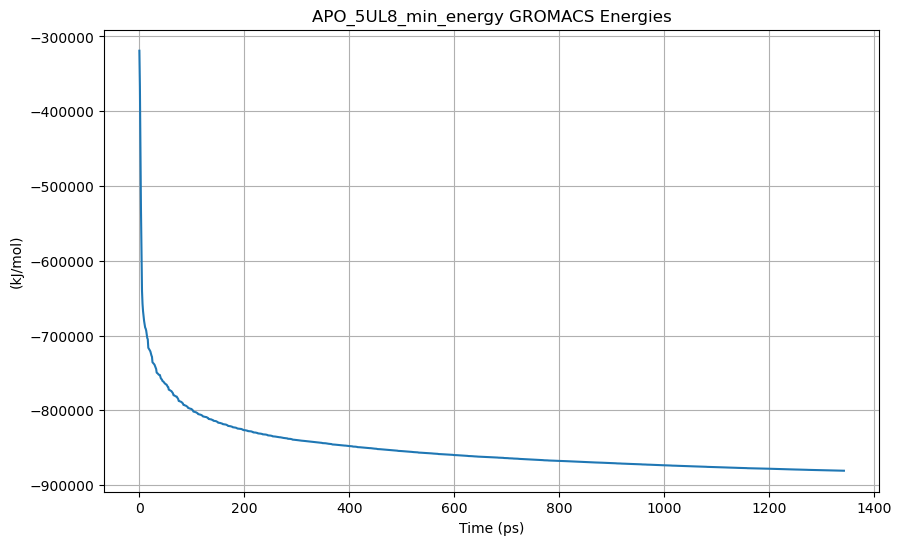

                      :-) GROMACS - gmx energy, 2023.2 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /home/alexi/Documents/SBL_MD_CovDock
Command line:
  gmx energy -f prod_structures/APO/APO_1K55_min.edr -o prod_structures/APO/APO_1K55_min_energy.xvg

Opened prod_structures/APO/APO_1K55_min.edr as single precision energy file

Select the terms you want from the following list by
selecting either (part of) the name or the number or a combination.
End your selection with an empty line or a zero.
-------------------------------------------------------------------
  1  Bond             2  Angle            3  Proper-Dih.      4  Per.-Imp.-Dih.
  5  LJ-14            6  Coulomb-14       7  LJ-(SR)          8  Coulomb-(SR)  
  9  Coul.-recip.    10  Potential       11  Pressure        12  Vir-XX        
 13  Vir-XY          14  Vir-XZ          15  Vir-YX          16  Vir-YY        
 17  Vir-YZ          18  Vir-ZX          19  Vir-ZY          20  


Statistics over 1263 steps [ 0.0000 through 1262.0000 ps ], 1 data sets
All statistics are over 1000 points (frames)

Energy                      Average   Err.Est.       RMSD  Tot-Drift
-------------------------------------------------------------------------------
Potential                   -720180      15000    40275.9   -95024.8  (kJ/mol)


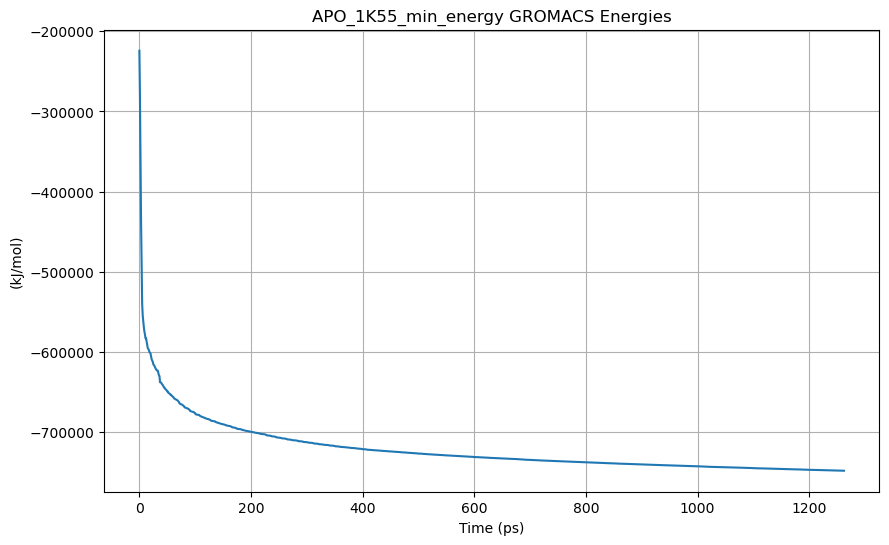

In [15]:
# Perform minimisation

for pdbcode in structures.PDBID:
    # prep minimisation
    min_mdp = os.path.join(settings.config, "minim.mdp")
    input_path = os.path.join(settings.structures_output, "APO_" + pdbcode + "_solv_ion.gro")
    topo_path = os.path.join(settings.structures_output, "APO_" + pdbcode+ ".top")
    tpr_path = os.path.join(settings.structures_output, "APO_" + pdbcode + "_min.tpr")
    # grompp_command = ["gmx", "grompp", "-f", min_mdp, "-c", input_path, "-p", topo_path, "-o", tpr_path]

    # subprocess.run(grompp_command, check=True)

    # # Run minimization
    # min_command = ["gmx", "mdrun", "-v", "-deffnm", tpr_path.replace(".tpr","")]
    # subprocess.run(min_command, check=True)

    # Get energy
    energy_command = ["gmx", "energy", "-f", tpr_path.replace(".tpr",".edr"), "-o", tpr_path.replace(".tpr","_energy.xvg")]
    subprocess.run(energy_command, input="10\n".encode(), check=True)
    plot_xvg(tpr_path.replace(".tpr","_energy.xvg"))

In [14]:
#Perform nvt equilibration of the apo protein

for pdbcode in structures.PDBID:
    nvt_mdp = os.path.join(settings.config, 'nvt.mdp')
    topo_path = os.path.join(settings.structures_output, "APO_" + pdbcode+ ".top")

    input_path = os.path.join(settings.structures_output, "APO_" + pdbcode + "_min.gro")
    tpr_path = os.path.join(settings.structures_output, "APO_" + pdbcode + "_nvt.tpr")

    grompp_command = ["gmx", "grompp", "-f", nvt_mdp, "-c", input_path, "-p", topo_path, "-o", tpr_path, "-r", input_path]
    subprocess.run(grompp_command, check=True)

    mdrun_command = ["gmx", "mdrun", "-deffnm", tpr_path.replace(".tpr","")]
    subprocess.run(mdrun_command, check=True)


    energy_command = ["gmx", "energy", "-f", tpr_path.replace(".tpr",".edr"), "-o", tpr_path.replace(".tpr","_temperature.xvg")]
    subprocess.run(energy_command, input="16\n".encode(), check=True)
    
    print("Done with " + pdbcode)


                      :-) GROMACS - gmx grompp, 2023.2 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /home/alexi/Documents/SBL_MD_CovDock
Command line:
  gmx grompp -f config/nvt.mdp -c prod_structures/APO/APO_6T3D_min.gro -p prod_structures/APO/APO_6T3D.top -o prod_structures/APO/APO_6T3D_nvt.tpr -r prod_structures/APO/APO_6T3D_min.gro

Ignoring obsolete mdp entry 'title'
Ignoring obsolete mdp entry 'ns_type'
Generating 1-4 interactions: fudge = 0.5
Number of degrees of freedom in T-Coupling group Protein is 13961.69
Number of degrees of freedom in T-Coupling group non-Protein is 122010.30

NOTE 1 [file config/nvt.mdp]:
  Removing center of mass motion in the presence of position restraints
  might cause artifacts. When you are using position restraints to
  equilibrate a macro-molecule, the artifacts are usually negligible.


There was 1 NOTE

Back Off! I just backed up prod_structures/APO/APO_6T3D_nvt.tpr to prod_structures/APO/#APO_6T3

Setting the LD random seed to -344088577

Generated 2145 of the 2145 non-bonded parameter combinations

Generated 2145 of the 2145 1-4 parameter combinations

Excluding 3 bonded neighbours molecule type 'Protein_chain_A'

turning H bonds into constraints...

Excluding 2 bonded neighbours molecule type 'SOL'

turning H bonds into constraints...

Excluding 1 bonded neighbours molecule type 'NA'

turning H bonds into constraints...

Excluding 1 bonded neighbours molecule type 'CL'

turning H bonds into constraints...

Setting gen_seed to 989854655

Velocities were taken from a Maxwell distribution at 300 K
Analysing residue names:
There are:   358    Protein residues
There are: 20272      Water residues
There are:   127        Ion residues
Analysing Protein...

The largest distance between excluded atoms is 0.420 nm between atom 4104 and 4111

Determining Verlet buffer for a tolerance of 0.005 kJ/mol/ps at 300 K

Calculated rlist for 1x1 atom pair-list as 1.034 nm, buffer size 0.034 nm

S

Changing nstlist from 10 to 100, rlist from 1 to 1.154

1 GPU selected for this run.
Mapping of GPU IDs to the 2 GPU tasks in the 1 rank on this node:
  PP:0,PME:0
PP tasks will do (non-perturbed) short-ranged interactions on the GPU
PP task will update and constrain coordinates on the GPU
PME tasks will do all aspects on the GPU
Using 1 MPI thread
Using 20 OpenMP threads 


Back Off! I just backed up prod_structures/APO/APO_6T3D_nvt.trr to prod_structures/APO/#APO_6T3D_nvt.trr.4#

Back Off! I just backed up prod_structures/APO/APO_6T3D_nvt.edr to prod_structures/APO/#APO_6T3D_nvt.edr.4#
starting mdrun 'Protein in water'
50000 steps,    100.0 ps.

Writing final coordinates.

Back Off! I just backed up prod_structures/APO/APO_6T3D_nvt.gro to prod_structures/APO/#APO_6T3D_nvt.gro.4#

               Core t (s)   Wall t (s)        (%)
       Time:      955.581       47.781     1999.9
                 (ns/day)    (hour/ns)
Performance:      180.830        0.133

GROMACS reminds you: "I was 


Statistics over 50001 steps [ 0.0000 through 100.0000 ps ], 1 data sets
All statistics are over 501 points

Energy                      Average   Err.Est.       RMSD  Tot-Drift
-------------------------------------------------------------------------------
Temperature                 299.867       0.19    3.09609     1.1026  (K)
Done with 6T3D


Number of degrees of freedom in T-Coupling group Protein is 10093.73
Number of degrees of freedom in T-Coupling group non-Protein is 102192.27

NOTE 1 [file config/nvt.mdp]:
  Removing center of mass motion in the presence of position restraints
  might cause artifacts. When you are using position restraints to
  equilibrate a macro-molecule, the artifacts are usually negligible.


There was 1 NOTE

Back Off! I just backed up prod_structures/APO/APO_5UL8_nvt.tpr to prod_structures/APO/#APO_5UL8_nvt.tpr.4#

GROMACS reminds you: "I was elected to lead, not to read" (President A. Schwarzenegger)

                      :-) GROMACS - gmx mdrun, 2023.2 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /home/alexi/Documents/SBL_MD_CovDock
Command line:
  gmx mdrun -deffnm prod_structures/APO/APO_5UL8_nvt


Back Off! I just backed up prod_structures/APO/APO_5UL8_nvt.log to prod_structures/APO/#APO_5UL8_nvt.log.4#
Reading file prod_structures/APO/APO_5

Setting the LD random seed to -336745088

Generated 2145 of the 2145 non-bonded parameter combinations

Generated 2145 of the 2145 1-4 parameter combinations

Excluding 3 bonded neighbours molecule type 'Protein_chain_A'

turning H bonds into constraints...

Excluding 2 bonded neighbours molecule type 'SOL'

turning H bonds into constraints...

Excluding 1 bonded neighbours molecule type 'NA'

turning H bonds into constraints...

Excluding 1 bonded neighbours molecule type 'CL'

turning H bonds into constraints...

Setting gen_seed to -1099513130

Velocities were taken from a Maxwell distribution at 300 K
Analysing residue names:
There are:   271    Protein residues
There are: 16981      Water residues
There are:   103        Ion residues
Analysing Protein...

The largest distance between excluded atoms is 0.422 nm between atom 679 and 680

Determining Verlet buffer for a tolerance of 0.005 kJ/mol/ps at 300 K

Calculated rlist for 1x1 atom pair-list as 1.034 nm, buffer size 0.034 nm

S

Changing nstlist from 10 to 100, rlist from 1 to 1.155

1 GPU selected for this run.
Mapping of GPU IDs to the 2 GPU tasks in the 1 rank on this node:
  PP:0,PME:0
PP tasks will do (non-perturbed) short-ranged interactions on the GPU
PP task will update and constrain coordinates on the GPU
PME tasks will do all aspects on the GPU
Using 1 MPI thread
Using 20 OpenMP threads 


Back Off! I just backed up prod_structures/APO/APO_5UL8_nvt.trr to prod_structures/APO/#APO_5UL8_nvt.trr.4#

Back Off! I just backed up prod_structures/APO/APO_5UL8_nvt.edr to prod_structures/APO/#APO_5UL8_nvt.edr.4#
starting mdrun 'CARBAPENEM-HYDROLYZING BETA-LACTAMASE KPC in water'
50000 steps,    100.0 ps.

Writing final coordinates.

Back Off! I just backed up prod_structures/APO/APO_5UL8_nvt.gro to prod_structures/APO/#APO_5UL8_nvt.gro.4#

               Core t (s)   Wall t (s)        (%)
       Time:      743.041       37.153     1999.9
                 (ns/day)    (hour/ns)
Performance:      232.554        0


Statistics over 50001 steps [ 0.0000 through 100.0000 ps ], 1 data sets
All statistics are over 501 points

Energy                      Average   Err.Est.       RMSD  Tot-Drift
-------------------------------------------------------------------------------
Temperature                 299.788       0.24    3.04879    1.40345  (K)
Done with 5UL8



NOTE 1 [file APO_1K55.top, line 36798]:
  In moleculetype 'Protein_chain_A' 2 atoms are not bound by a potential or
  constraint to any other atom in the same moleculetype. Although
  technically this might not cause issues in a simulation, this often means
  that the user forgot to add a bond/potential/constraint or put multiple
  molecules in the same moleculetype definition by mistake. Run with -v to
  get information for each atom.

Number of degrees of freedom in T-Coupling group Protein is 9678.70
Number of degrees of freedom in T-Coupling group non-Protein is 87114.30

NOTE 2 [file config/nvt.mdp]:
  Removing center of mass motion in the presence of position restraints
  might cause artifacts. When you are using position restraints to
  equilibrate a macro-molecule, the artifacts are usually negligible.


There were 2 NOTEs

Back Off! I just backed up prod_structures/APO/APO_1K55_nvt.tpr to prod_structures/APO/#APO_1K55_nvt.tpr.2#

GROMACS reminds you: "Push It Real Good" (Salt

Setting the LD random seed to -169624593

Generated 2145 of the 2145 non-bonded parameter combinations

Generated 2145 of the 2145 1-4 parameter combinations

Excluding 3 bonded neighbours molecule type 'Protein_chain_A'

turning H bonds into constraints...

Excluding 2 bonded neighbours molecule type 'SOL'

turning H bonds into constraints...

Excluding 1 bonded neighbours molecule type 'NA'

turning H bonds into constraints...

Excluding 1 bonded neighbours molecule type 'CL'

turning H bonds into constraints...

Setting gen_seed to -545813249

Velocities were taken from a Maxwell distribution at 300 K
Analysing residue names:
There are:   245    Protein residues
There are: 14475      Water residues
There are:    89        Ion residues
Analysing Protein...

The largest distance between excluded atoms is 0.424 nm between atom 3442 and 3450

Determining Verlet buffer for a tolerance of 0.005 kJ/mol/ps at 300 K

Calculated rlist for 1x1 atom pair-list as 1.034 nm, buffer size 0.034 nm



Changing nstlist from 10 to 100, rlist from 1 to 1.155

Update groups can not be used for this system because atoms that are (in)directly constrained together are interdispersed with other atoms

1 GPU selected for this run.
Mapping of GPU IDs to the 2 GPU tasks in the 1 rank on this node:
  PP:0,PME:0
PP tasks will do (non-perturbed) short-ranged interactions on the GPU
PP task will update and constrain coordinates on the GPU
PME tasks will do all aspects on the GPU
Using 1 MPI thread
Using 20 OpenMP threads 


Back Off! I just backed up prod_structures/APO/APO_1K55_nvt.trr to prod_structures/APO/#APO_1K55_nvt.trr.2#

Back Off! I just backed up prod_structures/APO/APO_1K55_nvt.edr to prod_structures/APO/#APO_1K55_nvt.edr.2#
starting mdrun 'BETA LACTAMASE OXA-10'
50000 steps,    100.0 ps.



Statistics over 50001 steps [ 0.0000 through 100.0000 ps ], 1 data sets
All statistics are over 501 points

Energy                      Average   Err.Est.       RMSD  Tot-Drift
-------------------------------------------------------------------------------
Temperature                 299.651       0.22    2.99202   0.920372  (K)
Done with 1K55



Writing final coordinates.

Back Off! I just backed up prod_structures/APO/APO_1K55_nvt.gro to prod_structures/APO/#APO_1K55_nvt.gro.2#

               Core t (s)   Wall t (s)        (%)
       Time:      640.596       32.031     1999.9
                 (ns/day)    (hour/ns)
Performance:      269.742        0.089

GROMACS reminds you: "Watch Out Where the Huskies Go" (F. Zappa)

                      :-) GROMACS - gmx energy, 2023.2 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /home/alexi/Documents/SBL_MD_CovDock
Command line:
  gmx energy -f prod_structures/APO/APO_1K55_nvt.edr -o prod_structures/APO/APO_1K55_nvt_temperature.xvg

Opened prod_structures/APO/APO_1K55_nvt.edr as single precision energy file

Select the terms you want from the following list by
selecting either (part of) the name or the number or a combination.
End your selection with an empty line or a zero.
-----------------------------------------------------------------

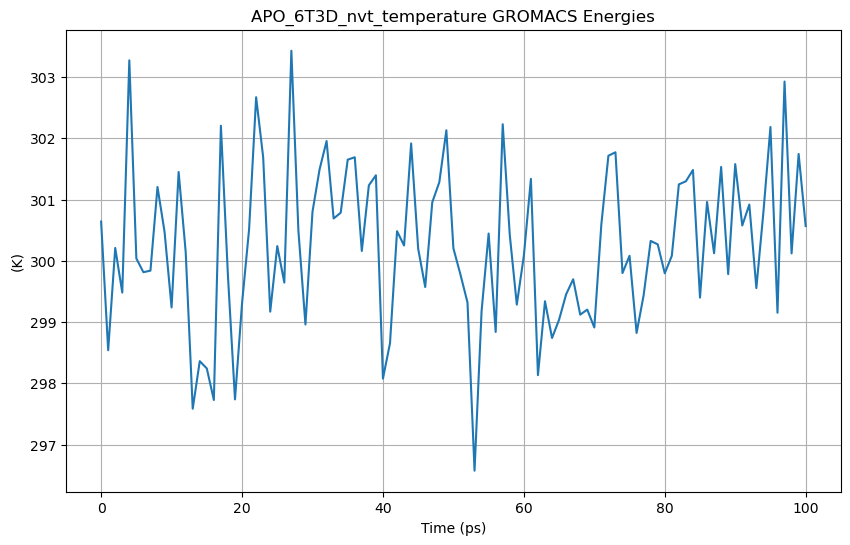

Done with 6T3D


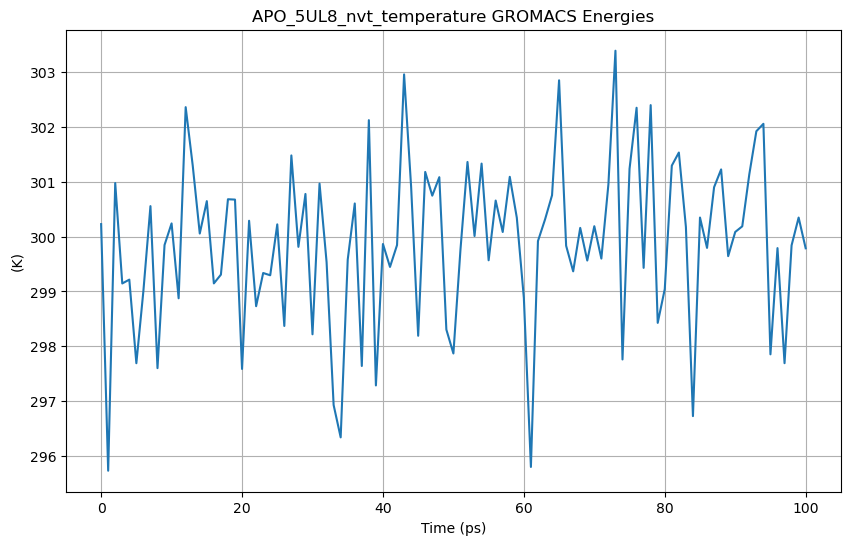

Done with 5UL8


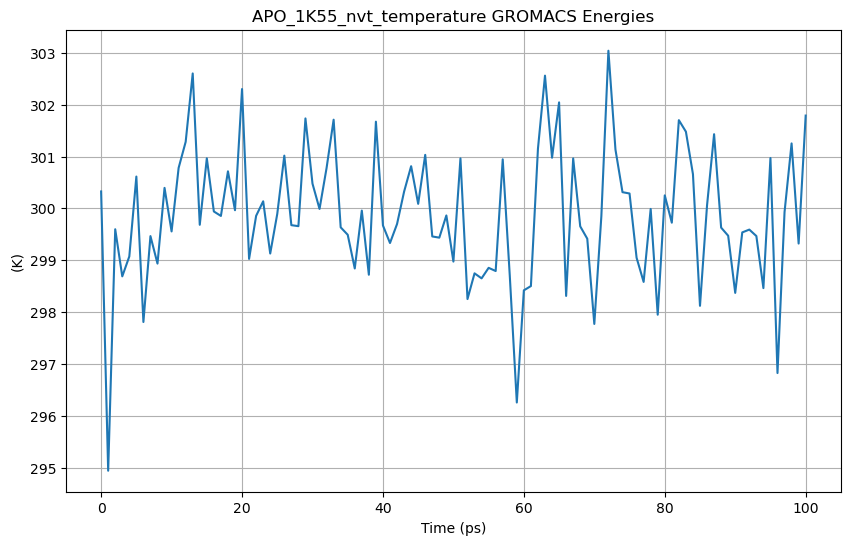

Done with 1K55


In [5]:
#Perform nvt equilibration of the apo protein

for pdbcode in structures.PDBID:
    nvt_mdp = os.path.join(settings.config, 'nvt.mdp')
    topo_path = os.path.join(settings.structures_output, "APO_" + pdbcode+ ".top")

    input_path = os.path.join(settings.structures_output, "APO_" + pdbcode + "_min.gro")
    tpr_path = os.path.join(settings.structures_output, "APO_" + pdbcode + "_nvt.tpr")

    # grompp_command = ["gmx", "grompp", "-f", nvt_mdp, "-c", input_path, "-p", topo_path, "-o", tpr_path, "-r", input_path]
    # subprocess.run(grompp_command, check=True)

    # mdrun_command = ["gmx", "mdrun", "-deffnm", tpr_path.replace(".tpr","")]
    # subprocess.run(mdrun_command, check=True)


    # energy_command = ["gmx", "energy", "-f", tpr_path.replace(".tpr",".edr"), "-o", tpr_path.replace(".tpr","_temperature.xvg")]
    # subprocess.run(energy_command, input="16\n".encode(), check=True)
    plot_xvg(tpr_path.replace(".tpr","_temperature.xvg"))

    print("Done with " + pdbcode)


In [17]:
#Perform npt equilibration of the apo protein

for pdbcode in structures.PDBID:
    npt_mdp = os.path.join(settings.config, 'npt.mdp')
    topo_path = os.path.join(settings.structures_output, "APO_" + pdbcode+ ".top")

    input_path = os.path.join(settings.structures_output, "APO_" + pdbcode + "_nvt.gro")
    tpr_path = os.path.join(settings.structures_output, "APO_" + pdbcode + "_npt.tpr")

    grompp_command = ["gmx", "grompp", "-f", npt_mdp, "-c", input_path, "-p", topo_path, "-o", tpr_path, "-r", input_path]

    subprocess.run(grompp_command, check=True)

    mdrun_command = ["gmx", "mdrun", "-deffnm", tpr_path.replace(".tpr","")]
    subprocess.run(mdrun_command, check=True)

    energy_command = ["gmx", "energy", "-f", tpr_path.replace(".tpr",".edr"), "-o", tpr_path.replace(".tpr","_pressure.xvg")]

    subprocess.run(energy_command, input="18\n".encode(), check=True)

    energy_command = ["gmx", "energy", "-f", tpr_path.replace(".tpr",".edr"), "-o", tpr_path.replace(".tpr","_density.xvg")]

    subprocess.run(energy_command, input="24\n".encode(), check=True)
    print("Done with " + pdbcode)


                      :-) GROMACS - gmx grompp, 2023.2 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /home/alexi/Documents/SBL_MD_CovDock
Command line:
  gmx grompp -f config/npt.mdp -c prod_structures/APO/APO_6T3D_nvt.gro -p prod_structures/APO/APO_6T3D.top -o prod_structures/APO/APO_6T3D_npt.tpr -r prod_structures/APO/APO_6T3D_nvt.gro

Ignoring obsolete mdp entry 'title'
Ignoring obsolete mdp entry 'ns_type'
Generating 1-4 interactions: fudge = 0.5

NOTE 1 [file APO_6T3D.top, line 53410]:
  You are combining position restraints with Parrinello-Rahman pressure
  coupling, which can lead to instabilities. If you really want to combine
  position restraints with pressure coupling, we suggest to use Berendsen
  pressure coupling instead.

Number of degrees of freedom in T-Coupling group Protein is 13961.69
Number of degrees of freedom in T-Coupling group non-Protein is 122010.30

NOTE 2 [file config/npt.mdp]:
  Removing center of mass motion

Setting the LD random seed to -303137957

Generated 2145 of the 2145 non-bonded parameter combinations

Generated 2145 of the 2145 1-4 parameter combinations

Excluding 3 bonded neighbours molecule type 'Protein_chain_A'

turning H bonds into constraints...

Excluding 2 bonded neighbours molecule type 'SOL'

turning H bonds into constraints...

Excluding 1 bonded neighbours molecule type 'NA'

turning H bonds into constraints...

Excluding 1 bonded neighbours molecule type 'CL'

turning H bonds into constraints...

The center of mass of the position restraint coord's is  4.376  4.377  4.369

The center of mass of the position restraint coord's is  4.376  4.377  4.369
Analysing residue names:
There are:   358    Protein residues
There are: 20272      Water residues
There are:   127        Ion residues
Analysing Protein...

The largest distance between excluded atoms is 0.429 nm between atom 394 and 402

Determining Verlet buffer for a tolerance of 0.005 kJ/mol/ps at 300 K

Calculated rl

Changing nstlist from 10 to 100, rlist from 1 to 1.155

1 GPU selected for this run.
Mapping of GPU IDs to the 2 GPU tasks in the 1 rank on this node:
  PP:0,PME:0
PP tasks will do (non-perturbed) short-ranged interactions on the GPU
PP task will update and constrain coordinates on the GPU
PME tasks will do all aspects on the GPU
Using 1 MPI thread
Using 20 OpenMP threads 


Back Off! I just backed up prod_structures/APO/APO_6T3D_npt.trr to prod_structures/APO/#APO_6T3D_npt.trr.1#

Back Off! I just backed up prod_structures/APO/APO_6T3D_npt.edr to prod_structures/APO/#APO_6T3D_npt.edr.1#
starting mdrun 'Protein in water'
50000 steps,    100.0 ps.

Writing final coordinates.

Back Off! I just backed up prod_structures/APO/APO_6T3D_npt.gro to prod_structures/APO/#APO_6T3D_npt.gro.1#

               Core t (s)   Wall t (s)        (%)
       Time:      842.550       42.129     1999.9
                 (ns/day)    (hour/ns)
Performance:      205.088        0.117

GROMACS reminds you: "I want


Statistics over 50001 steps [ 0.0000 through 100.0000 ps ], 1 data sets
All statistics are over 501 points

Energy                      Average   Err.Est.       RMSD  Tot-Drift
-------------------------------------------------------------------------------
Pressure                    4.43587        3.8    136.724     3.9784  (bar)

Statistics over 50001 steps [ 0.0000 through 100.0000 ps ], 1 data sets
All statistics are over 501 points

Energy                      Average   Err.Est.       RMSD  Tot-Drift
-------------------------------------------------------------------------------
Density                     1019.02       0.16    4.39416   0.261552  (kg/m^3)
Done with 6T3D



NOTE 1 [file APO_5UL8.top, line 38334]:
  You are combining position restraints with Parrinello-Rahman pressure
  coupling, which can lead to instabilities. If you really want to combine
  position restraints with pressure coupling, we suggest to use Berendsen
  pressure coupling instead.

Number of degrees of freedom in T-Coupling group Protein is 10093.73
Number of degrees of freedom in T-Coupling group non-Protein is 102192.27

NOTE 2 [file config/npt.mdp]:
  Removing center of mass motion in the presence of position restraints
  might cause artifacts. When you are using position restraints to
  equilibrate a macro-molecule, the artifacts are usually negligible.


There were 2 NOTEs

Back Off! I just backed up prod_structures/APO/APO_5UL8_npt.tpr to prod_structures/APO/#APO_5UL8_npt.tpr.1#

GROMACS reminds you: "I wanted to make a clever chemistry joke, but the best ones Argon." (39.948)

                      :-) GROMACS - gmx mdrun, 2023.2 (-:

Executable:   /usr/local/gromacs/bi

Setting the LD random seed to -543162369

Generated 2145 of the 2145 non-bonded parameter combinations

Generated 2145 of the 2145 1-4 parameter combinations

Excluding 3 bonded neighbours molecule type 'Protein_chain_A'

turning H bonds into constraints...

Excluding 2 bonded neighbours molecule type 'SOL'

turning H bonds into constraints...

Excluding 1 bonded neighbours molecule type 'NA'

turning H bonds into constraints...

Excluding 1 bonded neighbours molecule type 'CL'

turning H bonds into constraints...

The center of mass of the position restraint coord's is  4.083  4.101  4.112

The center of mass of the position restraint coord's is  4.083  4.101  4.112
Analysing residue names:
There are:   271    Protein residues
There are: 16981      Water residues
There are:   103        Ion residues
Analysing Protein...

The largest distance between excluded atoms is 0.428 nm between atom 1407 and 1415

Determining Verlet buffer for a tolerance of 0.005 kJ/mol/ps at 300 K

Calculated 


Back Off! I just backed up prod_structures/APO/APO_5UL8_npt.log to prod_structures/APO/#APO_5UL8_npt.log.1#
Reading file prod_structures/APO/APO_5UL8_npt.tpr, VERSION 2023.2 (single precision)
Changing nstlist from 10 to 100, rlist from 1 to 1.156

1 GPU selected for this run.
Mapping of GPU IDs to the 2 GPU tasks in the 1 rank on this node:
  PP:0,PME:0
PP tasks will do (non-perturbed) short-ranged interactions on the GPU
PP task will update and constrain coordinates on the GPU
PME tasks will do all aspects on the GPU
Using 1 MPI thread
Using 20 OpenMP threads 


Back Off! I just backed up prod_structures/APO/APO_5UL8_npt.trr to prod_structures/APO/#APO_5UL8_npt.trr.1#

Back Off! I just backed up prod_structures/APO/APO_5UL8_npt.edr to prod_structures/APO/#APO_5UL8_npt.edr.1#
starting mdrun 'CARBAPENEM-HYDROLYZING BETA-LACTAMASE KPC in water'
50000 steps,    100.0 ps.

Writing final coordinates.

Back Off! I just backed up prod_structures/APO/APO_5UL8_npt.gro to prod_structures/APO/#


Statistics over 50001 steps [ 0.0000 through 100.0000 ps ], 1 data sets
All statistics are over 501 points

Energy                      Average   Err.Est.       RMSD  Tot-Drift
-------------------------------------------------------------------------------
Pressure                    -6.5157        1.5    135.463    2.82757  (bar)

Statistics over 50001 steps [ 0.0000 through 100.0000 ps ], 1 data sets
All statistics are over 501 points

Energy                      Average   Err.Est.       RMSD  Tot-Drift
-------------------------------------------------------------------------------
Density                     1016.11        0.2    3.95128  -0.785719  (kg/m^3)
Done with 5UL8



NOTE 1 [file APO_1K55.top, line 36798]:
  You are combining position restraints with Parrinello-Rahman pressure
  coupling, which can lead to instabilities. If you really want to combine
  position restraints with pressure coupling, we suggest to use Berendsen
  pressure coupling instead.


NOTE 2 [file APO_1K55.top, line 36798]:
  In moleculetype 'Protein_chain_A' 2 atoms are not bound by a potential or
  constraint to any other atom in the same moleculetype. Although
  technically this might not cause issues in a simulation, this often means
  that the user forgot to add a bond/potential/constraint or put multiple
  molecules in the same moleculetype definition by mistake. Run with -v to
  get information for each atom.

Number of degrees of freedom in T-Coupling group Protein is 9678.70
Number of degrees of freedom in T-Coupling group non-Protein is 87114.30

NOTE 3 [file config/npt.mdp]:
  Removing center of mass motion in the presence of position restraints
  might cause artifact

Setting the LD random seed to -44183561

Generated 2145 of the 2145 non-bonded parameter combinations

Generated 2145 of the 2145 1-4 parameter combinations

Excluding 3 bonded neighbours molecule type 'Protein_chain_A'

turning H bonds into constraints...

Excluding 2 bonded neighbours molecule type 'SOL'

turning H bonds into constraints...

Excluding 1 bonded neighbours molecule type 'NA'

turning H bonds into constraints...

Excluding 1 bonded neighbours molecule type 'CL'

turning H bonds into constraints...

The center of mass of the position restraint coord's is  3.912  4.000  3.812

The center of mass of the position restraint coord's is  3.912  4.000  3.812
Analysing residue names:
There are:   245    Protein residues
There are: 14475      Water residues
There are:    89        Ion residues
Analysing Protein...

The largest distance between excluded atoms is 0.426 nm between atom 357 and 358

Determining Verlet buffer for a tolerance of 0.005 kJ/mol/ps at 300 K

Calculated rli


Back Off! I just backed up prod_structures/APO/APO_1K55_npt.log to prod_structures/APO/#APO_1K55_npt.log.1#
Reading file prod_structures/APO/APO_1K55_npt.tpr, VERSION 2023.2 (single precision)
Changing nstlist from 10 to 100, rlist from 1 to 1.156

Update groups can not be used for this system because atoms that are (in)directly constrained together are interdispersed with other atoms

1 GPU selected for this run.
Mapping of GPU IDs to the 2 GPU tasks in the 1 rank on this node:
  PP:0,PME:0
PP tasks will do (non-perturbed) short-ranged interactions on the GPU
PP task will update and constrain coordinates on the GPU
PME tasks will do all aspects on the GPU
Using 1 MPI thread
Using 20 OpenMP threads 


Back Off! I just backed up prod_structures/APO/APO_1K55_npt.trr to prod_structures/APO/#APO_1K55_npt.trr.1#

Back Off! I just backed up prod_structures/APO/APO_1K55_npt.edr to prod_structures/APO/#APO_1K55_npt.edr.1#
starting mdrun 'BETA LACTAMASE OXA-10'
50000 steps,    100.0 ps.



Statistics over 50001 steps [ 0.0000 through 100.0000 ps ], 1 data sets
All statistics are over 501 points

Energy                      Average   Err.Est.       RMSD  Tot-Drift
-------------------------------------------------------------------------------
Pressure                  -0.274313        3.9    152.726   -10.8328  (bar)

Statistics over 50001 steps [ 0.0000 through 100.0000 ps ], 1 data sets
All statistics are over 501 points

Energy                      Average   Err.Est.       RMSD  Tot-Drift
-------------------------------------------------------------------------------
Density                     1019.56       0.18      4.413   -0.23207  (kg/m^3)
Done with 1K55



Writing final coordinates.

Back Off! I just backed up prod_structures/APO/APO_1K55_npt.gro to prod_structures/APO/#APO_1K55_npt.gro.1#

               Core t (s)   Wall t (s)        (%)
       Time:      665.979       33.302     1999.8
                 (ns/day)    (hour/ns)
Performance:      259.451        0.093

GROMACS reminds you: "If it's all right with Dirac, it's all right with me." (Enrico Fermi, on being told that there was experimental evidence He-3 nuclei obey Fermi-Dirac statistics.)

                      :-) GROMACS - gmx energy, 2023.2 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /home/alexi/Documents/SBL_MD_CovDock
Command line:
  gmx energy -f prod_structures/APO/APO_1K55_npt.edr -o prod_structures/APO/APO_1K55_npt_pressure.xvg

Opened prod_structures/APO/APO_1K55_npt.edr as single precision energy file

Select the terms you want from the following list by
selecting either (part of) the name or the number or a combinatio

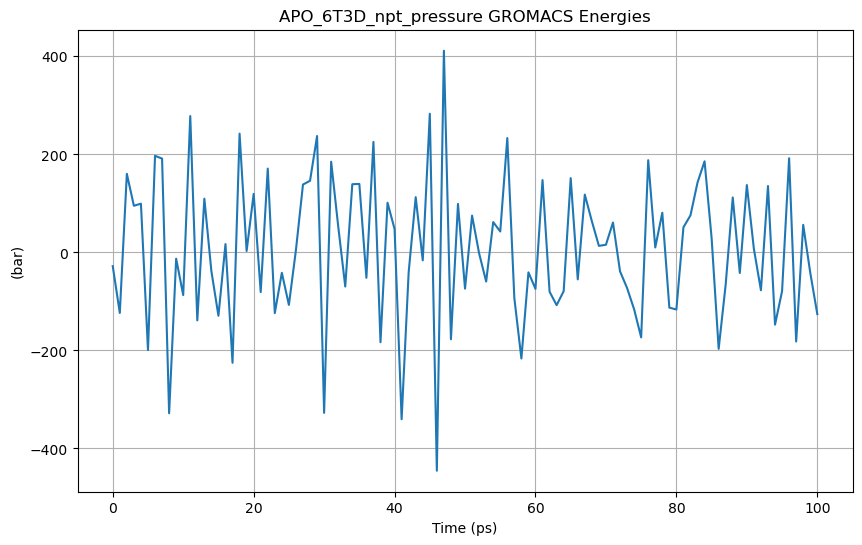

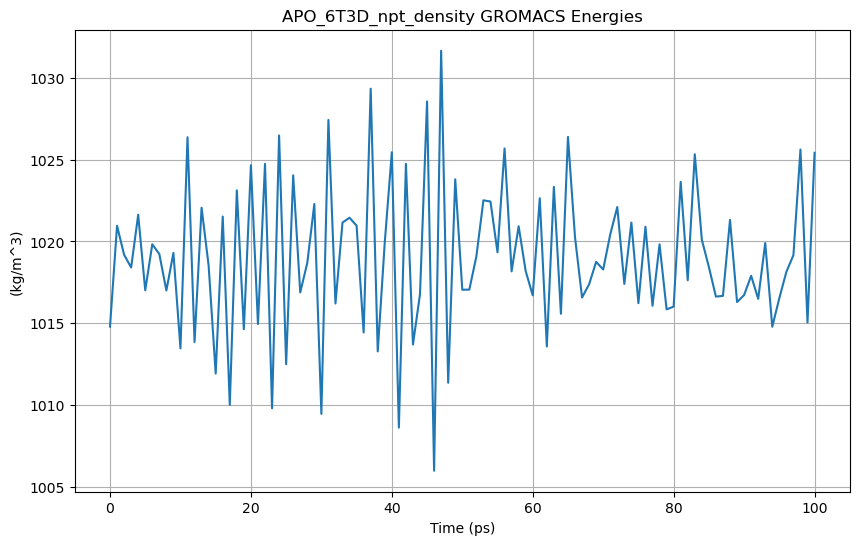

Done with 6T3D


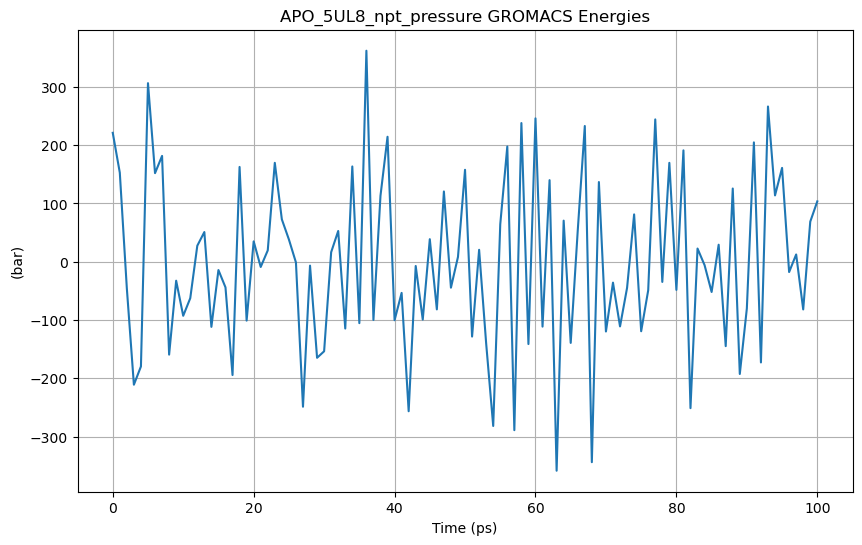

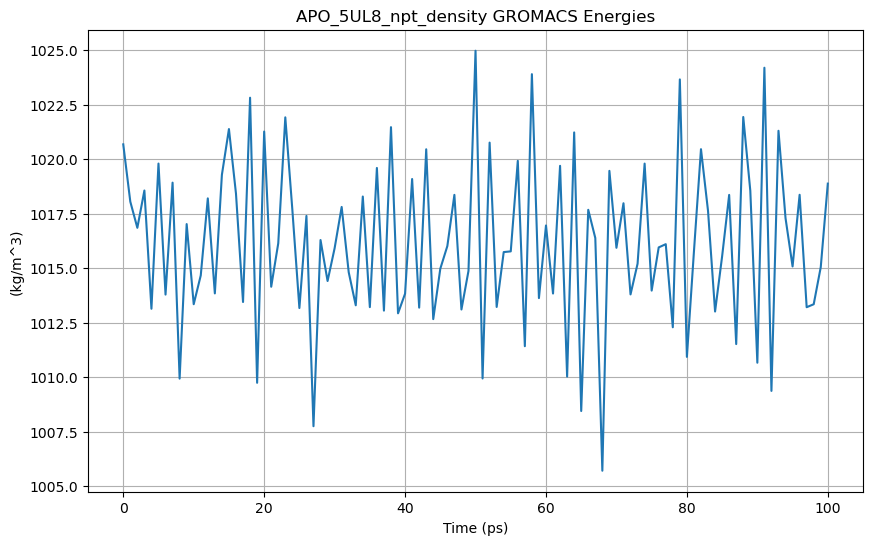

Done with 5UL8


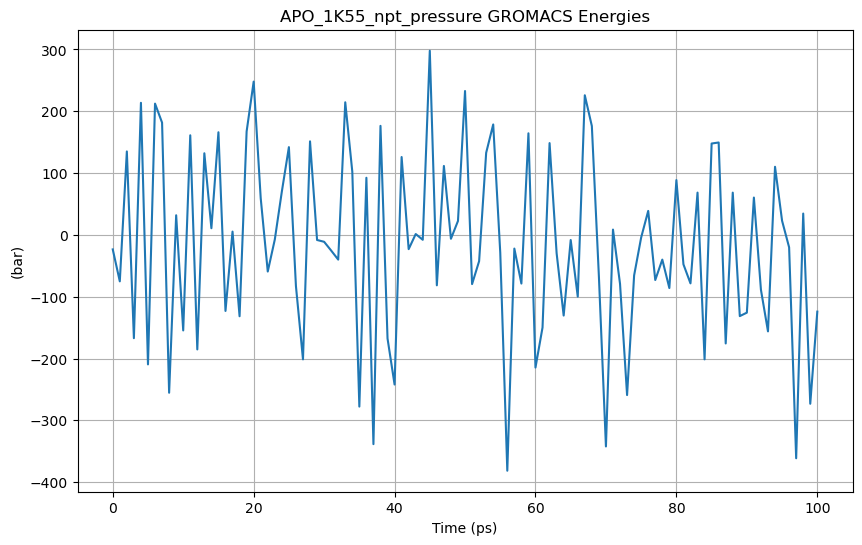

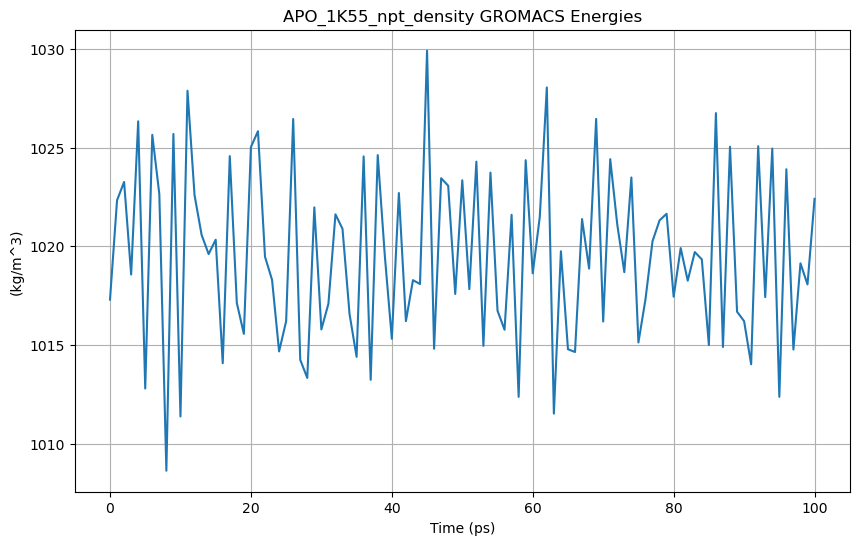

Done with 1K55


In [6]:
#Perform npt equilibration of the apo protein

for pdbcode in structures.PDBID:
    npt_mdp = os.path.join(settings.config, 'npt.mdp')
    topo_path = os.path.join(settings.structures_output, "APO_" + pdbcode+ ".top")

    input_path = os.path.join(settings.structures_output, "APO_" + pdbcode + "_nvt.gro")
    tpr_path = os.path.join(settings.structures_output, "APO_" + pdbcode + "_npt.tpr")

    # grompp_command = ["gmx", "grompp", "-f", npt_mdp, "-c", input_path, "-p", topo_path, "-o", tpr_path, "-r", input_path]

    # subprocess.run(grompp_command, check=True)

    # mdrun_command = ["gmx", "mdrun", "-deffnm", tpr_path.replace(".tpr","")]
    # subprocess.run(mdrun_command, check=True)

    # energy_command = ["gmx", "energy", "-f", tpr_path.replace(".tpr",".edr"), "-o", tpr_path.replace(".tpr","_pressure.xvg")]

    # subprocess.run(energy_command, input="18\n".encode(), check=True)

    # energy_command = ["gmx", "energy", "-f", tpr_path.replace(".tpr",".edr"), "-o", tpr_path.replace(".tpr","_density.xvg")]

    # subprocess.run(energy_command, input="24\n".encode(), check=True)

    plot_xvg(tpr_path.replace(".tpr","_pressure.xvg"))
    plot_xvg(tpr_path.replace(".tpr","_density.xvg"))
    print("Done with " + pdbcode)